# Genetic algorithm

What is the genetic algorithm?

The genetic algorithm is a heuristic search algorithm that is inspired by Charles Darwnin’s theory of natural evolution. This algorithm reflects the process of natural selection, where the fittest individuals are selected for reproduction to produce the offspring of the next generation. The same idea is also implemented for hyperparameter optimization to find the values of different hyperparameters that can produce the best-performing ML model.

Genetic algorithms are widely used for solving optimization problems such as:

Finding the optimal configuration of parameters or variables in engineering design

Optimizing financial portfolios

Aligning sequences, predicting protein structures, and selecting optimal genes in bioin

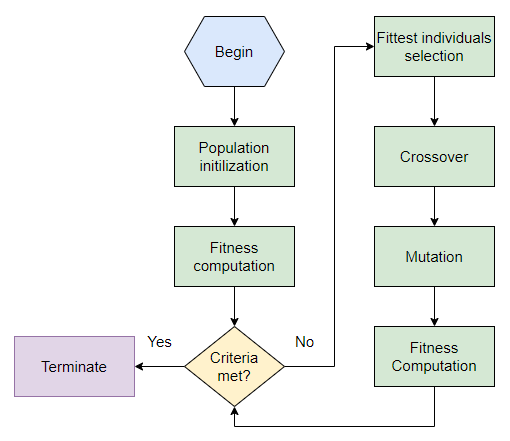

How does the genetic algorithm work?

There are five phases in the genetic algorithm, which are as follows:

Initialization: The first phase is generating a population of individuals, where each individual is a solution to the problem we want to solve (also known as a chromosome). The individual is characterized by a set of parameters (variables) known as genes. These genes are joined into a string to form a chromosome (solution).

Fitness assignment: The second phase is to use the fitness function to determine how fit an individual is, which means the ability of an individual to compete with other individuals. The fitness function will show the fitness score of each individual from the population.

Selection: The third phase is to implement the selection process based on the fitness score assigned to each individual. The fittest individuals are selected to be used for reproduction by passing their genes to the next generations. At this phase, the rank-based selection method or tournament selection method can be applied to the fittest individuals based on their fitness scores. The tournament selection method is used to randomly select a subset of individuals from the population and then evaluate the fitness of each individual in the tournament. Finally, it chooses the best individual from the subset to be a parent.

Crossover (reproduction): This is the most significant phase in a genetic algorithm. Once the selected parents are chosen, crossover operations are applied to create new offspring. This can be done by combining two parent solutions (exchanging their genes) until the crossover point is reached. Then, new offspring will be added to the population.

Termination: The last phase is where the algorithm terminates if the population has converged, which means it does not produce offspring that are significantly different from the previous generation.

Finally, the genetic algorithm has provided a set of solutions to our problem. For our case, it will be an ML model with the best combination of hyperparameters’ values that produce the best performance compared to other 

Benefits of the genetic algorithm : 

Global search capability is one of the main advantages of genetic algorithms over traditional hyperparameter optimization methods like grid search and random search. Genetic algorithms maintain a population of candidate solutions. This population-based approach enables the algorithm to explore multiple combinations of the hyperparameter space at each iteration, making it more adept at escaping local optima and finding globally optimal solutions.

Another notable strength of genetic algorithms lies in their ability to efficiently optimize high-dimensional hyperparameter spaces. This is achieved through a process known as crossover, where two candidate solutions are combined to generate a new solution. By leveraging this mechanism, genetic algorithms can navigate complex, multi-dimensional spaces more effectively than traditional methods.

Genetic algorithms offer a powerful optimization tool for hyperparameter tuning tasks, but they require careful consideration of the underlying problem structure, the choice of operators, and the interpretation of results. Interpreting the results involves understanding whether the algorithm has converged to a good solution or if it needs more exploration to find better solutions. It is often recommended to run the algorithm multiple times and analyze the distribution of results to draw meaningful conclusions.combinations.formatics

## Import Important packages
First, we import important Python packages that will do the following tasks:

- Load the dataset.
- Clean the dataset.
- Process the dataset using feature engineering techniques.
- Create and train machine learning model (K-nearest neighbors algorithm) with default hyperparameters.
- Check machine learning model performance.
- Implement the genetic algorithm using TPOT library.
- Identify combination of hyperparameters that provide the best results.

In [1]:
# Import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# Seeding
np.random.seed(123)


## Load the dataset
We will use pandas to load the dataset from the data folder. The name of the dataset is
loan_data.csv.

In [2]:
# Load data

data_path = "loan_data.csv"

data = pd.read_csv(data_path)

Let’s see the first five rows of the dataset using the head() method from pandas.

In [3]:
# Show top five rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see, the dataset has 13 columns.

- Loan_ID: Unique loan ID
- Gender: Male/Female 
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant education (Graduate/Undergraduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Co-applicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of the loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi-Urban/Rural
- Loan_Status: Loan approved (Y/N)

The shape method from pandas will let us know the total number of rows and columns available in
the dataset.

In [4]:
# Check the shape of the data
data.shape

(614, 13)

The dataset has 614 loan data.

The pandas method called info() provides more details about each column presented in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The information above shows that the dataset has columns with different data types, such as object/string, integers, and float.

## Check missing values

It is important to clean the dataset by checking if it has any missing values before starting to
train the machine learning model.

The following code will provide a total of missing values for each column presented in the dataset.

In [6]:
# Check the missing values in data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The output shows that our dataset has some missing values in different columns.

First, let’s convert some values in the Loan_Status and Dependents columns into numerical values.

In [7]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

For columns with object data type, we use the mode() function from pandas to identify the most common value in that particular column and insert the identified value into all missing points in the column.

For columns with numerical data type(int64 or float64), we use the median() function from pandas to find the median value in that particular column and insert the identified value into all missing points in the column.

In [12]:
round(100*(data.isnull().sum()/len(data.index)),2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [13]:
# Handle missing data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

We drop the ID column because it is not used in the process of training a machine learning model.

In [14]:
# Drop ID column
data = data.drop('Loan_ID',axis=1)

Let's check again if all missing values in the dataset have been handled.

In [15]:
# Check missing values in data
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, the dataset does not have any missing values.

## How to evaluate class distribution
Identifying the class distribution helps us to know if the dataset is balanced or not. The value_counts() method from the pandas package can evaluate the class distribution by showing the total number of each unique value in the target column.

In [16]:
# Evaluate Loan_status column
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

This shows that in this dataset, the distribution in the target column is unequal. There are more 1 values (Yes) than 0 values (No).

## Split data into feature and target variables

The next step is to split data into feature and target variables.

In [17]:
#Split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

The target is the Loan_Status variable.

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [18]:
#Scale the numerical columns with MinMaxScaler()
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

In [19]:
#Change categorical features to numerical with get_dummies()
X = pd.get_dummies(X)

#Convert the DataFrame to a NumPy array.
X = X.to_numpy()

## Train a base machine learning model

In this example, we will train the K-nearest neighbors algorithm with default hyperparameter values using the cross-validation technique to check the model performance.

In [20]:
# Create a classifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

We will use the `cross_val_score()` method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.


To use `cross_val_score()` method, we need to define the following parameters:

1. `estimator`: The machine learning model object to fit the data
2. `X`: The data/features to fit the machine learning model on
3. `y`: The target variable of the model classification or regression tasks
4. `scoring`: The evaluation error metric to use
5. `cv`: The number of splits to use (example 3).


The main goal is to prevent model over-fitting and promote model generalization.


Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [21]:
# Define function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)


# Implement and run the cross-val-score method
score = cross_val_score(estimator=knn_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# Print the mean score
print(round(score.mean(), 4))

0.5671


The mean score of our machine learning model is 0.5671, we need to improve the model performance in order to produce better results.


## Implement the genetic algorithm

Because we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance by using the genetic algorithm to find the combination of hyperparameter values that can give an F1-score of more than 0.5671.

The K-nearest neighbors algorithm has multiple hyperparameters, as shown below ([see the documentation](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/neighbors/_classification.py#L24)):

`KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None`

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.5671.

 - `n_neighbors`: The number of neighbors to use

- `weights`: The weight function used in prediction

- `algorithm`: The algorithm used to compute the nearest neighbors

- `leaf_size`: The leaf size passed to BallTree or KDTree


In [22]:
# Define the options for the selected hyperparameters

n_neighbors = [int(x) for x in np.linspace(start=5, stop=100, num=3)]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree','brute']
leaf_size = [int(x) for x in np.linspace(10, 1000, 10)]

param = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'algorithm': algorithm,
    'leaf_size': leaf_size
}
print(param)

{'n_neighbors': [5, 52, 100], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


To implement the genetic algorithm using the TPOT library, we need to define the following important parameters.

- `generations`: A number of iterations to the run pipeline optimization process
- `population_size`: A number of individuals to retain in the genetic programming population every generation
- `offspring_size`: A number of offspring to produce in each genetic programming generation
- `config_dict`:The configuration dictionary for customizing the model and parameters that TPOT searches in the optimization process
- `scoring`: The function used to evaluate the quality or performance of a given pipeline for the classification problem
- `CV`: Cross-validation strategy used when evaluating pipelines
- `n_job`: The number of processes to use in parallel for evaluating pipelines during the TPOT optimization process


In [23]:
# Number of generations
no_generations = 5

# Number of population size
no_population_size = 24

# Number of offspring size
no_offsptring_size = 12

# The configuration dictionary
knn_dictionary = {'sklearn.neighbors.KNeighborsClassifier': param}

# The scoring method
scoring_method = 'f1_macro'

# Cross-validation splitting strategy
cv = 3

# Number of processes
jobs = -1  # will use as many cores as available on the computer.

The next step is to import `TPOPTClassifier` from the TPOT library and instantiate the genetic algorithm search.

In [24]:
# Import the TPOTclassifier from TPOT library.
from tpot import TPOTClassifier

# Define the genetic algorithm and the important parameters we have defined.
tpot_classifier = TPOTClassifier(generations=no_generations,
                                 population_size=no_population_size,
                                 offspring_size=no_offsptring_size,
                                 config_dict=knn_dictionary,
                                 cv=cv,
                                 scoring=scoring_method,
                                 n_jobs=jobs,
                                 verbosity=2,
                                 early_stop=12,
                                 random_state=42)

After defining everything that is required to optimize using the genetic algorithm, the search is executed using the `fit()` method with the training dataset.

In [25]:
# Execute the genetic search
tpot_classifier.fit(X,y)

Version 0.11.7 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6590349410265249

Generation 2 - Current best internal CV score: 0.6590349410265249

Generation 3 - Current best internal CV score: 0.6590349410265249

Generation 4 - Current best internal CV score: 0.6590349410265249

Generation 5 - Current best internal CV score: 0.6590349410265249

Best pipeline: KNeighborsClassifier(CombineDFs(input_matrix, input_matrix), algorithm=brute, leaf_size=450, n_neighbors=5, weights=distance)


TPOTClassifier(config_dict={'sklearn.neighbors.KNeighborsClassifier': {'algorithm': ['auto',
                                                                                     'ball_tree',
                                                                                     'kd_tree',
                                                                                     'brute'],
                                                                       'leaf_size': [10,
                                                                                     120,
                                                                                     230,
                                                                                     340,
                                                                                     450,
                                                                                     560,
                                                                               

Note: The time it takes to run the search could range anywhere from a few minutes to hours, depending on the scope of the search space, dataset size, and the processing power of the hardware.

At the end of the optimization, we can use the following attributes to access all the results.

- `fitted_pipeline`: The best pipeline that TPOT discovered during the pipeline optimization process

In [26]:
# Show the best combination of hyperparameters
print("best combination of hyperparameters:", tpot_classifier.fitted_pipeline_)

best combination of hyperparameters: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7c262d7ce280>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7c262d7ce280>))])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', leaf_size=450,
                                      weights='distance'))])


This shows that when the hyperparameters have the above values ia as follows:

- `n_neighbors` = 5
- `weights` = 'distance'
- `algorithm` = 'brute'
- `leaf_size` = 450

These will produce the best result based on the defined search space.

The best score is an F1-score of 0.6590 which is greater than 0.5671.

As we can see the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more options or values of hyperparameters on the **search space**, number of `generations`, `populations`, and `offspring_size` in the `TPOTClassifier()` method and then try to rerun it. It may be able to provide better results than what we have found.

# Advantages of the genetic algorithm

Global search capability: Traditional hyperparameter optimization methods, such as grid search and random search, are often susceptible to getting stuck in local optima. This is because they typically explore the hyperparameter space in a sequential manner, starting from a single point. A genetic algorithm, on the other hand, is a population-based algorithm that maintains a set of candidate solutions at all times. This allows it to explore multiple parts of the hyperparameter space simultaneously and to escape local optima more easily

Ability to optimize high-dimensional hyperparameter spaces: The genetic algorithm can efficiently optimize high-dimensional hyperparameter spaces by using a process called crossover. Crossover combines two candidate solutions to produce a new candidate solution. This allows the genetic algorithm to explore the hyperparameter space more efficiently and to find better hyperparameter settings than traditional methods.

Parallelizability: The genetic algorithm can be easily parallelized, which can significantly speed up the hyperparameter optimization process (when the number of hyperparameters is few). This is because each hyperparameter candidate can be evaluated independently.

# Disadvantages of the genetic algorithm

Sensitivity to the initial population: The performance of the genetic algorithm can be sensitive to the initial population of candidate solutions (combinations of hyperparameters). If the initial population is not diverse enough, the algorithm can converge to a local optimum instead of the global optimum. It is recommended to add more options for each hyperparameter to avoid this problem

Difficulty in tuning parameters: The genetic algorithm has a number of parameters that need to be tuned before the optimization process is initiated, such as the population size, crossover rate, and mutation rate. The optimal values of these parameters vary depending on the problem, and it can be difficult to find the best values without experimentation.

Computational complexity: The genetics algorithm can be computationally expensive, especially for problems with a large number of hyperparameters or when the evaluation of each hyperparameter setting is time-consuming. This is because the genetic algorithm needs to evaluate a population of candidate solutions at each iteration, and the population size can be quite larg
e...